In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
# from sklearn.cluster import KMedoids
from sklearn.decomposition import PCA


In [ ]:
dataset = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target,
                                                    test_size=.2, random_state=0)

X_train.shape

(455, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=2, random_state=0)
pca.fit(X_train)

PCA(n_components=2, random_state=0)

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(455, 2)

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.cluster_centers_

array([[-0.29459984,  0.19240192, -0.22298224, -0.32421685,  0.82266769,
         1.05628422,  0.74400162,  0.42896455,  0.80789152,  1.33213668,
        -0.14454012,  0.14874649, -0.10116271, -0.22185731,  0.52006505,
         1.16386693,  0.93513065,  0.83782791,  0.42743543,  1.14822884,
        -0.2177823 ,  0.33784259, -0.14812241, -0.2660503 ,  0.97177441,
         1.18297776,  1.00985599,  0.69134322,  0.85668411,  1.44429108],
       [ 1.60223431,  0.6517083 ,  1.61027293,  1.62600654,  0.44127309,
         0.97843711,  1.25942369,  1.49766456,  0.40600407, -0.29735525,
         1.39293534,  0.03352655,  1.36101717,  1.35384994, -0.07230794,
         0.44447709,  0.36287946,  0.71763581, -0.0356744 ,  0.09566261,
         1.65907878,  0.57000392,  1.65538377,  1.65852894,  0.40241059,
         0.72363398,  0.9324601 ,  1.29136287,  0.30336403,  0.13171859],
       [-0.42713929, -0.25206459, -0.44761902, -0.42714352, -0.3443663 ,
        -0.57095026, -0.58047998, -0.5759515 , -0

In [ ]:
X_train[0]

array([-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
       -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
       -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
       -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
       -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
       -0.73009743, -0.81232053, -0.75798367, -0.01614761, -0.38503402])

In [ ]:
X_train_kmeans = kmeans.transform(X_train)
X_test_kmeans = kmeans.transform(X_test)

In [ ]:
X_train_kmeans.shape

(455, 3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

model = LogisticRegression()
model.fit(X_train_pca, y_train)
preds_pca = model.predict(X_test_pca)

accuracy_score(y_test, preds_pca) * 100

92.10526315789474

In [ ]:
model = LogisticRegression()
model.fit(X_train_kmeans, y_train)
preds_kmeans = model.predict(X_test_kmeans)

accuracy_score(y_test, preds_kmeans) * 100

91.22807017543859

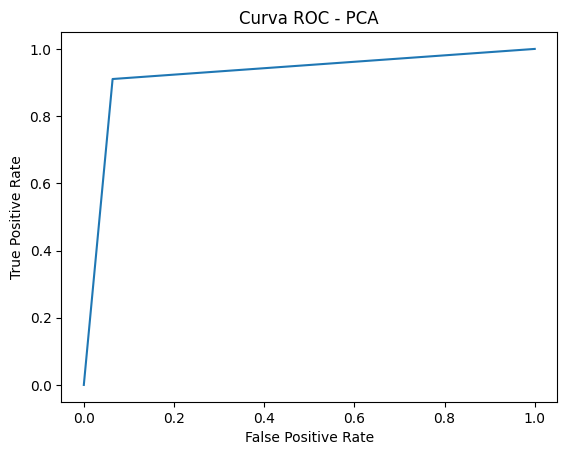

In [ ]:
fpr, tpr, _ = roc_curve(y_test, preds_pca)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Curva ROC - PCA')
plt.show()

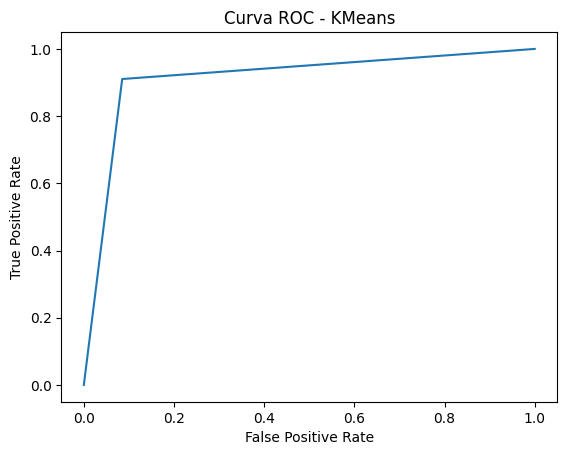

In [ ]:
fpr, tpr, _ = roc_curve(y_test, preds_kmeans)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()
plt.title('Curva ROC - KMeans')
plt.show()